<a href="https://colab.research.google.com/github/KelvinKilonzo97/Sasini/blob/main/Kelvin_Kilonzo_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
!pip install pandas nltk wordcloud matplotlib
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [104]:
df = pd.read_csv("https://raw.githubusercontent.com/KelvinKilonzo97/Sasini/main/SASINIAnnual.csv", encoding='ISO-8859-1')
df

,Year,Report
0,2022.0,SASINI PLC ANNUAL REPORT AND FINANCIAL STATEME...
1,NaN,NaN
2,2023.0,SASINI PLC ANNUAL REPORT AND FINANCIAL STATEME...
3,NaN,NaN
4,2021.0,SASINI PLC ANNUAL REPORT AND FINANCIAL STATEME...


In [105]:
df.dropna(inplace= True)
df

,Year,Report
0,2022.0,SASINI PLC ANNUAL REPORT AND FINANCIAL STATEME...
2,2023.0,SASINI PLC ANNUAL REPORT AND FINANCIAL STATEME...
4,2021.0,SASINI PLC ANNUAL REPORT AND FINANCIAL STATEME...


In [106]:
# punkt tokenizer data
nltk.download('punkt')

# 'Report' column tokenization
df['tokenized_text'] = df['Report'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [107]:
# Add 'comment_count' column
df['comment_count'] = 1

In [108]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 4
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            3 non-null      float64
 1   Report          3 non-null      object 
 2   tokenized_text  3 non-null      object 
 3   comment_count   3 non-null      int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 120.0+ bytes
None
         Year  comment_count
count     3.0            3.0
mean   2022.0            1.0
std       1.0            0.0
min    2021.0            1.0
25%    2021.5            1.0
50%    2022.0            1.0
75%    2022.5            1.0
max    2023.0            1.0


In [109]:
df['Report'] = df['Report'].astype(str)
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce').dt.year

In [110]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 4
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            3 non-null      int64 
 1   Report          3 non-null      object
 2   tokenized_text  3 non-null      object
 3   comment_count   3 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 120.0+ bytes
None
         Year  comment_count
count     3.0            3.0
mean   2022.0            1.0
std       1.0            0.0
min    2021.0            1.0
25%    2021.5            1.0
50%    2022.0            1.0
75%    2022.5            1.0
max    2023.0            1.0


In [111]:
df

,Year,Report,tokenized_text,comment_count
0,2022,SASINI PLC ANNUAL REPORT AND FINANCIAL STATEME...,"[SASINI, PLC, ANNUAL, REPORT, AND, FINANCIAL, ...",1
2,2023,SASINI PLC ANNUAL REPORT AND FINANCIAL STATEME...,"[SASINI, PLC, ANNUAL, REPORT, AND, FINANCIAL, ...",1
4,2021,SASINI PLC ANNUAL REPORT AND FINANCIAL STATEME...,"[SASINI, PLC, ANNUAL, REPORT, AND, FINANCIAL, ...",1


In [112]:
# Separate out words with sentences
word_tokenizer = CountVectorizer().build_tokenizer()
df1 = pd.concat([
    pd.DataFrame({
        'word': word_tokenizer(Report),
        'sentence_id': range(1, len(word_tokenizer(Report)) + 1)
    }) for Report in df['Report']
], ignore_index=True)

In [113]:
df1

,word,sentence_id
0,SASINI,1
1,PLC,2
2,ANNUAL,3
3,REPORT,4
4,AND,5
...,...,...
15003,strong,5017
15004,These,5018
15005,strong,5019
15006,prices,5020


In [114]:
# Add back sentences and sentiments
sia = SentimentIntensityAnalyzer()
df2 = pd.DataFrame({
    'sentence_id': range(1, len(df1) + 1),
    'sentiment': [TextBlob(sentence).sentiment.polarity for sentence in df1['word']]
})

In [72]:
df2

,sentence_id,sentiment
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000
...,...,...
15003,15004,0.433333
15004,15005,0.000000
15005,15006,0.433333
15006,15007,0.000000


In [116]:
df3

,sentence_id,sentiment
44,45,0.050000
111,112,-0.125000
122,123,-0.125000
265,266,-0.071429
319,320,-0.200000
...,...,...
14920,14921,-0.333333
14990,14991,0.050000
14996,14997,0.700000
15003,15004,0.433333


In [118]:
df4 = pd.merge(df1,df3, on='sentence_id')

In [119]:
df4

,word,sentence_id,sentiment
0,General,45,0.050000
1,General,45,0.050000
2,General,45,0.050000
3,Other,112,-0.125000
4,or,112,-0.125000
...,...,...,...
300,good,4977,0.700000
301,in,4977,0.700000
302,we,4977,0.700000
303,strong,5006,0.433333


In [120]:
# Exclude sentiments with '0' value
df5 = df4[df4['sentiment'] != 0]

In [121]:
df5

,word,sentence_id,sentiment
0,General,45,0.050000
1,General,45,0.050000
2,General,45,0.050000
3,Other,112,-0.125000
4,or,112,-0.125000
...,...,...,...
300,good,4977,0.700000
301,in,4977,0.700000
302,we,4977,0.700000
303,strong,5006,0.433333


In [122]:
word_freq = df5['word'].explode().value_counts().reset_index()
word_freq.columns = ['word', 'freq']

In [123]:
print(word_freq)

             word  freq
0         Limited    19
1             the    11
2         General     9
3              of     7
4            full     6
..            ...   ...
188       MEETING     1
189     factories     1
190      together     1
191  Agricultural     1
192     financial     1

[193 rows x 2 columns]


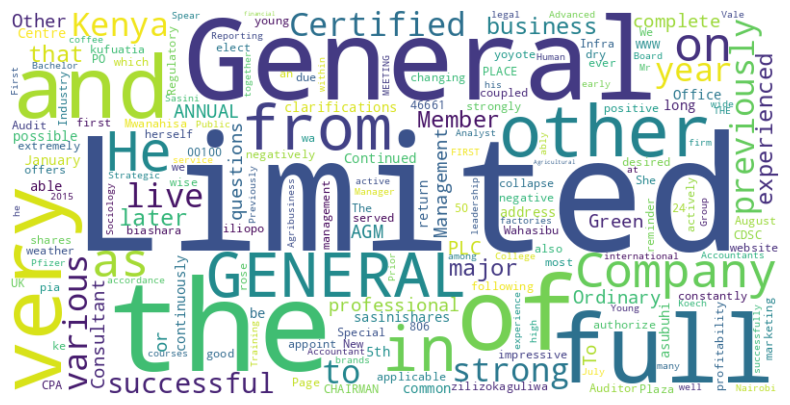

In [124]:
# 3 - word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(word_freq['word'], word_freq['freq'])))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [98]:
# Summarize sentiments
print(df5['sentiment'].describe())

count    305.000000
mean       0.124803
std        0.288727
min       -0.300000
25%       -0.071429
50%        0.050000
75%        0.250000
max        1.000000
Name: sentiment, dtype: float64


In [100]:
# Summarize sentence count
df7 = df5.groupby('sentence_id')['sentiment'].count().reset_index()
df7.columns = ['sentence_id', 'commentcount']
print(df7)

     sentence_id  commentcount
0             45             3
1            112             3
2            123             3
3            266             3
4            320             3
..           ...           ...
97          4942             3
98          4943             3
99          4976             3
100         4977             3
101         5006             2

[102 rows x 2 columns]


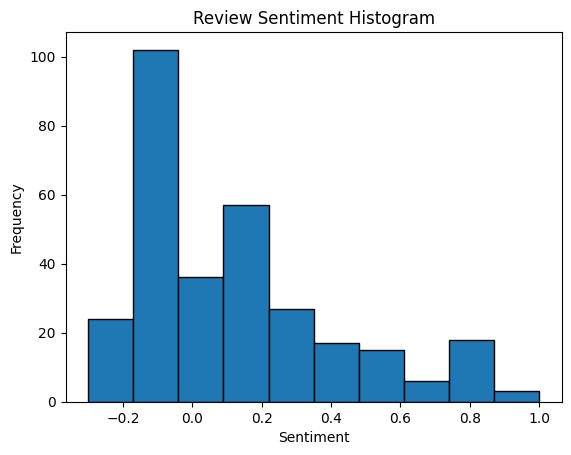

In [102]:
# Histogram of sentiments
plt.hist(df5['sentiment'], bins=10, edgecolor='black')
plt.title('Review Sentiment Histogram')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()